In [1]:
import os
import sys
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)



In [2]:
plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

In [3]:
directory = os.path.join(os.getcwd(), 'data')
reps = 0

avg_HO_error = np.zeros(1000)
avg_Pl_error = np.zeros(1000)

for filename in os.listdir(directory):
    if filename.endswith('.csv'):

        reps +=1
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Load data into a pandas DataFrame
        df = pd.read_csv(file_path)

        HO_error = np.array(df['Avg_HO_Error'])
        PL_error = np.array(df['Avg_PL_Error'])

        avg_HO_error += HO_error
        avg_Pl_error += PL_error


avg_HO_error = avg_HO_error/reps
avg_PL_error = avg_Pl_error/reps

def stop_array_sequentially(array, threshold=1e-10):
    for i, value in enumerate(array):
        if value < threshold:
            print(array[i])
            return array[:i]
    return array


6.384595963027096e-11


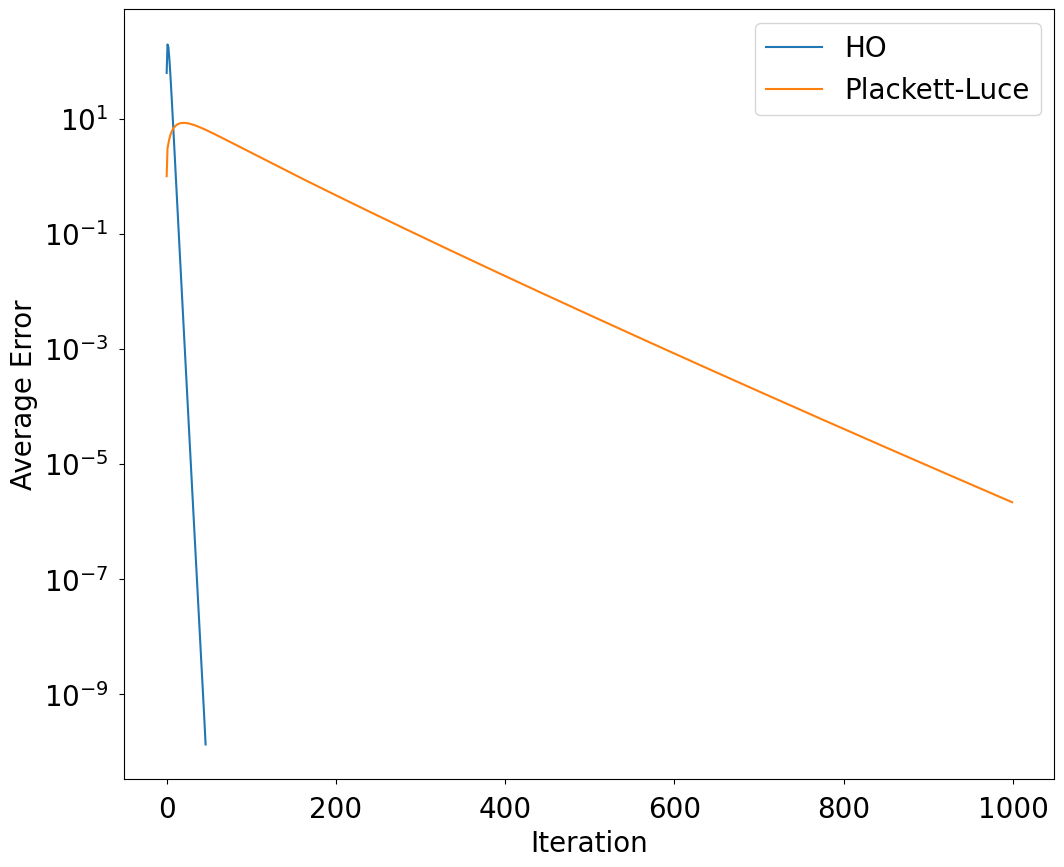

In [6]:

above_thresh_ho = stop_array_sequentially(avg_HO_error[1:])
above_thresh_PL = stop_array_sequentially(avg_PL_error)

plt.figure(figsize=(12, 10))
plt.yscale('log')
plt.plot(above_thresh_ho, label='HO')
plt.plot(above_thresh_PL, label='Plackett-Luce')
plt.xlabel('Iteration')
plt.ylabel('Average Error')
plt.legend()

plt.savefig('Convergence')
plt.show()